In [29]:
! pip install tensorflow-gpu

In [30]:
! pip install keras

In [31]:
! pip install pandas

Customer Churn Prediction Using Artificial Neural Network (ANN)
Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [32]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.3.1
Hub version: 0.9.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [33]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob


In [34]:
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import os
import cv2

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
file="/content/drive/My Drive/Colab Notebooks/Churn_Modelling.csv"


In [37]:
import pandas as pd
df=pd.read_csv(file)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [38]:
df.shape

(10000, 14)

In [39]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [40]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [41]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [42]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

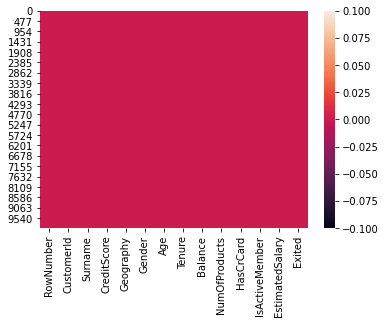

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.heatmap(df.isnull())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


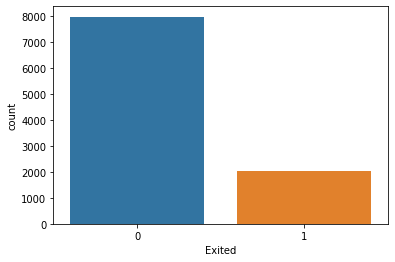

In [44]:
sns.countplot('Exited', data=df)
plt.show()


In [45]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [46]:
df1=df.select_dtypes(include='object')
df1.columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [47]:
cols=['Surname', 'Geography', 'Gender']
for i in cols:
  df[i]=encoder.fit_transform(df[i])

In [48]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [49]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname              int64
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [50]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [51]:
X_train.shape

(7000, 10)

In [52]:
X_test.shape

(3000, 10)

In [53]:
len(X_train.columns)

10

In [54]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [55]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [58]:
def create_model(dense_layers,activation,optimizer):
    model = Sequential()
    for index, lsize in enumerate(dense_layers):
        # Input Layer - includes the input_shape
        if index == 0:
          model.add(Dense(lsize,activation=activation,input_shape=(10,)))
        else:
          model.add(Dense(lsize,activation=activation))   
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer = optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,verbose=1)

param_grid = {'dense_layers': [(8),(8,4)],
              'activation':['relu'],
              'optimizer':['adam'],
              'epochs':[50],
              'batch_size':[64]}

grid = GridSearchCV(model,param_grid=param_grid, cv=5)

grid_results = grid.fit(X_train,y_train)

print('Parameters of the best model: ')
print(grid_results.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'int' object is not iterable

  FitFailedWarning)


Epoch 1/50
88/88 [==============================] - 0s 2ms/step - loss: 0.6029 - accuracy: 0.7395
Epoch 2/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4971 - accuracy: 0.7986
Epoch 3/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4641 - accuracy: 0.7986
Epoch 4/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4489 - accuracy: 0.7986
Epoch 5/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4390 - accuracy: 0.7986
Epoch 6/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.7986
Epoch 7/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.7986
Epoch 8/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.7989
Epoch 9/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.8032
Epoch 10/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8055
Epoch 11/50
88/88 [

In [61]:
params=grid_results.best_params_
params

{'activation': 'relu',
 'batch_size': 64,
 'dense_layers': (8, 4),
 'epochs': 50,
 'optimizer': 'adam'}

In [62]:
model = Sequential([
    Dense(8, input_dim=10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

r=model.fit(X_train, y_train, epochs=50, batch_size=64,validation_data=(X_test,y_test))

Epoch 1/50
110/110 [==============================] - 0s 4ms/step - loss: 0.7671 - accuracy: 0.4017 - val_loss: 0.6653 - val_accuracy: 0.6193
Epoch 2/50
110/110 [==============================] - 0s 3ms/step - loss: 0.5903 - accuracy: 0.7403 - val_loss: 0.5301 - val_accuracy: 0.7930
Epoch 3/50
110/110 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.8066 - val_loss: 0.4713 - val_accuracy: 0.7943
Epoch 4/50
110/110 [==============================] - 0s 3ms/step - loss: 0.4479 - accuracy: 0.8149 - val_loss: 0.4502 - val_accuracy: 0.8040
Epoch 5/50
110/110 [==============================] - 0s 3ms/step - loss: 0.4323 - accuracy: 0.8209 - val_loss: 0.4391 - val_accuracy: 0.8090
Epoch 6/50
110/110 [==============================] - 0s 3ms/step - loss: 0.4219 - accuracy: 0.8271 - val_loss: 0.4302 - val_accuracy: 0.8120
Epoch 7/50
110/110 [==============================] - 0s 3ms/step - loss: 0.4128 - accuracy: 0.8326 - val_loss: 0.4215 - val_accuracy: 0.8147
Epoch 

In [64]:
yp= model.predict(X_test)
yp

array([[0.6358395 ],
       [0.57408905],
       [0.6702301 ],
       ...,
       [0.3855124 ],
       [0.09114679],
       [0.03823144]], dtype=float32)

In [65]:

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [66]:
y_pred

[1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [67]:
y_pred_labels=np.unique(y_pred, return_counts=True)
y_pred_labels

(array([0, 1]), array([2660,  340]))

In [68]:

y_test_labels=np.unique(y_test, return_counts=True)
y_test_labels

(array([0, 1]), array([2380,  620]))

In [69]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_test, y_pred)
c_m


array([[2300,   80],
       [ 360,  260]])

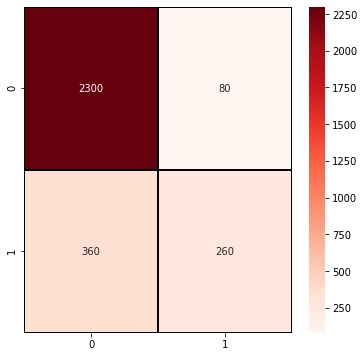

In [70]:
import seaborn as sns
plt.figure(figsize = (6,6))
sns.heatmap(c_m,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' )

In [82]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2380
           1       0.76      0.42      0.54       620

    accuracy                           0.85      3000
   macro avg       0.81      0.69      0.73      3000
weighted avg       0.84      0.85      0.84      3000



In [71]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [72]:
os=SMOTETomek()
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The number of classes before fit Counter({0: 5583, 1: 1417})
The number of classes after fit Counter({0: 5524, 1: 5524})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [83]:
model1 = Sequential([
    Dense(8, input_dim=10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

rs=model1.fit(X_train_ns, y_train_ns, epochs=500, batch_size=64,validation_data=(X_test,y_test))

Epoch 1/500
173/173 [==============================] - 1s 3ms/step - loss: 0.7114 - accuracy: 0.5217 - val_loss: 0.6868 - val_accuracy: 0.6027
Epoch 2/500
173/173 [==============================] - 0s 3ms/step - loss: 0.6330 - accuracy: 0.6407 - val_loss: 0.6036 - val_accuracy: 0.6730
Epoch 3/500
173/173 [==============================] - 0s 3ms/step - loss: 0.5765 - accuracy: 0.6989 - val_loss: 0.5897 - val_accuracy: 0.6730
Epoch 4/500
173/173 [==============================] - 0s 3ms/step - loss: 0.5531 - accuracy: 0.7182 - val_loss: 0.5745 - val_accuracy: 0.6833
Epoch 5/500
173/173 [==============================] - 0s 3ms/step - loss: 0.5380 - accuracy: 0.7293 - val_loss: 0.5656 - val_accuracy: 0.6763
Epoch 6/500
173/173 [==============================] - 0s 3ms/step - loss: 0.5210 - accuracy: 0.7461 - val_loss: 0.5641 - val_accuracy: 0.6793
Epoch 7/500
173/173 [==============================] - 0s 3ms/step - loss: 0.5054 - accuracy: 0.7504 - val_loss: 0.5430 - val_accuracy: 0.6973

In [84]:
k1=rs.history['val_accuracy']
print('The Validation Accuracy of ANN Model: ', np.mean(k1))

The Validation Accuracy of ANN Model:  0.7846333322525024


In [85]:
yp1= model1.predict(X_test)
yp1

array([[0.7898528 ],
       [0.7161298 ],
       [0.87722886],
       ...,
       [0.4988499 ],
       [0.2099174 ],
       [0.02417961]], dtype=float32)

In [86]:
y_pred1 = []
for element in yp1:
    if element > 0.5:
        y_pred1.append(1)
    else:
        y_pred1.append(0)

In [87]:
y_pred1

[1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [88]:
y_pred_labels1=np.unique(y_pred1, return_counts=True)
y_pred_labels1

(array([0, 1]), array([2135,  865]))

In [89]:
y_test_labels=np.unique(y_test, return_counts=True)
y_test_labels

(array([0, 1]), array([2380,  620]))

In [90]:
from sklearn.metrics import confusion_matrix
c_m1 = confusion_matrix(y_test, y_pred1)
c_m1

array([[1961,  419],
       [ 174,  446]])

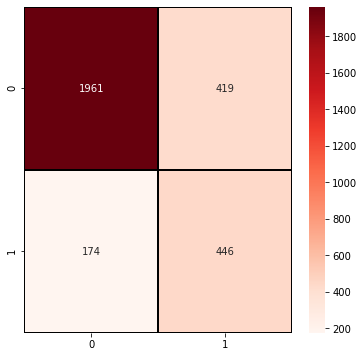

In [91]:
import seaborn as sns
plt.figure(figsize = (6,6))
sns.heatmap(c_m1,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' )

In [92]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred1))


              precision    recall  f1-score   support

           0       0.92      0.82      0.87      2380
           1       0.52      0.72      0.60       620

    accuracy                           0.80      3000
   macro avg       0.72      0.77      0.73      3000
weighted avg       0.84      0.80      0.81      3000

